In [1]:
 import pandas as pd
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/ma_data_louvain1.csv') 
data.columns

Index(['dn', 'contract_id', 'produit', 'full_vol', 'full_secteur', 'full_city',
       'source', 'unit', 'a_own', 'b_number', 'duration', 'num_interactions',
       'num_interactions_sms', 'offnet', 'communaute', 'duration_wh',
       'num_interactions_wh', 'num_interactions_sms_wh'],
      dtype='object')

In [2]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
# Sélection des colonnes pertinentes
selected_columns = ['produit', 'full_vol', 'full_secteur', 'full_city','source','a_own','duration', 
                    'num_interactions','num_interactions_sms','communaute']
# Extraction des données à partir des colonnes sélectionnées
X = data[selected_columns]
# Définition des valeurs de K que nous voulons tester
k_values = range(5, 21)

# Liste pour stocker les scores des silhouettes pour chaque K
silhouette_scores = []

# Boucle sur les différentes valeurs de K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Tracé des scores des silhouettes en fonction de K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de K pour K-means')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
selected_columns = ['produit', 'full_vol', 'full_secteur', 'full_city','source', 'unit', 'a_own', 'b_number', 'duration', 'num_interactions','num_interactions_sms', 'offnet', 'communaute', 'duration_wh','num_interactions_wh', 'num_interactions_sms_wh']
# Extraction des données à partir des colonnes sélectionnées
X = data[selected_columns]
# Instanciation et ajustement du modèle K-means
k = 14  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Récupération des coordonnées des centres de cluster
cluster_centers = kmeans.cluster_centers_

# Affichage des étiquettes de cluster pour chaque point de données
print(labels)

# Affichage des coordonnées des centres de cluster
print(cluster_centers)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 6 12  6 ...  5  8 12]
[[3.48722730e+01 1.66473114e+01 7.08698863e+03 1.84805146e+01
  6.67350364e-01 6.67350364e-01 9.99813537e-01 3.77449869e+04
  4.23855395e+00 1.27628291e+00 9.22474944e-02 7.04456461e-01
  1.98075310e+04 2.49882386e+00 7.01556311e-01 4.28116102e-02]
 [3.35976151e+01 1.71292393e+01 6.99672130e+03 1.80874931e+01
  7.81336661e-01 7.81336661e-01 1.00000000e+00 7.58297512e+04
  4.24630002e+00 1.28152593e+00 1.02164991e-01 6.92041043e-01
  5.56154243e+03 2.52240430e+00 7.13078409e-01 5.05773179e-02]
 [3.49308560e+01 1.66891736e+01 7.17218099e+03 1.89321501e+01
  6.57977445e-01 6.57977445e-01 9.99630246e-01 7.61006082e+03
  4.20204261e+00 1.25276991e+00 9.88452856e-02 7.06230357e-01
  1.97647460e+04 2.46264994e+00 6.86174561e-01 5.00434193e-02]
 [3.55202481e+01 1.67277468e+01 7.27001067e+03 1.86624407e+01
  6.53775994e-01 6.53775994e-01 1.00000000e+00 6.60700844e+04
  4.67426388e+00 1.56228406e+00 5.33255122e-02 8.28438526e-01
  1.89200985e+03 2.87218029e+00 8.59361827e

Le score de silhouette moyen est : 0.28239261609136135


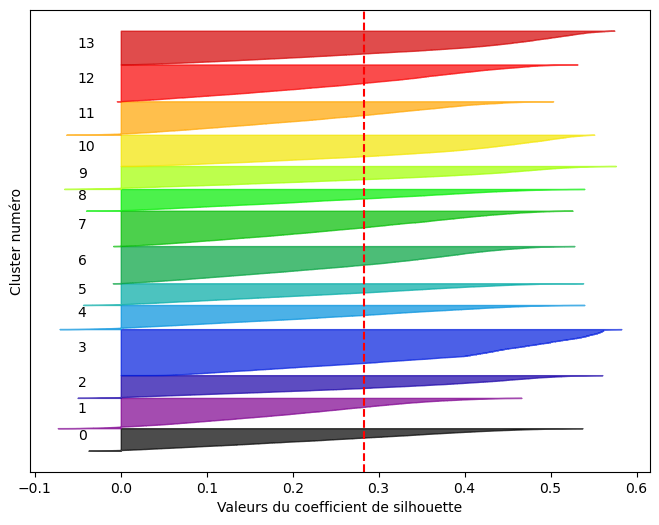

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(X, labels)
print("Le score de silhouette moyen est :", silhouette_avg)# Calcul des scores de silhouette pour chaque point de données
sample_silhouette_values = silhouette_samples(X, labels)

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(k):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / k)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()


In [6]:
data['cluster'] = kmeans.labels_

# Affichage des étiquettes de cluster pour chaque point de données
print(data['cluster'])

0        3
1        1
2        3
3        4
4        3
        ..
99994    3
99995    1
99996    0
99997    4
99998    4
Name: cluster, Length: 99999, dtype: int32


In [7]:
data.to_csv("C:/Users/hp/Desktop/prj_pfe_inwi/ma_data_louvain_kmeans.csv", index=False)